In [72]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer

In [90]:
jobs_df = pd.read_csv('./jobs_df_4_classes_Q2.csv')

In [91]:
jobs_df.comb_description_Q2

0      nsw full time marketing communication business...
1      nsw full time information communication techno...
2      nsw full time information communication techno...
3      nsw full time healthcare medical collaboration...
4      nsw contract temp administration office suppor...
5      nsw contract temp accounting newly formed aust...
6      nsw full time healthcare medical collaboration...
7      nsw full time administration office support pa...
8      nsw full time information communication techno...
9      vic full time administration office support u ...
10     vic full time mining resource energy client au...
11     act contract temp government defence client se...
12     nsw full time information communication techno...
13     nsw full time information communication techno...
14     vic contract temp administration office suppor...
15     nsw full time banking financial service client...
16     act contract temp government defence australia...
17     nsw contract temp inform

# CountVectorize 'comb_description'

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # initialise vector
X = vectorizer.fit_transform(jobs_df['comb_description_Q2'])

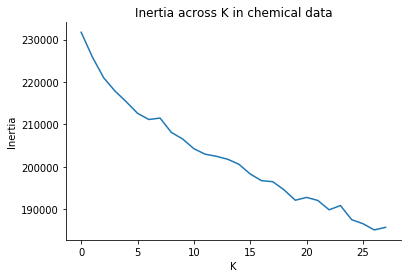

In [73]:
inertias = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    #print(inertia)
    inertias.append(inertia)

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K data")
sns.despine()

There is no prominent elbow.

In [97]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=10)
X = vectorizer.fit_transform(jobs_df['comb_description_Q2'])
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[6 6 6 6 7 7 6 7 6 6 7 7 7 6 7 7 8 6 7 8 4 7 9 6 7 6 4 6 7 6 7 6 7 6 7 7 6
 4 3 6 6 0 0 7 7 7 9 6 9 7 7 0 0 6 7 7 7 9 7 7 9 7 7 7 6 6 0 6 7 6 7 6 7 7
 6 7 6 7 9 7 0 6 7 7 7 6 7 6 4 6 7 7 7 7 4 0 6 7 7 7 6 7 4 7 7 6 4 7 6 7 4
 6 7 7 7 7 6 0 4 7 7 7 7 7 7 0 7 6 7 9 9 7 7 7 9 7 7 7 7 6 7 7 7 7 6 7 4 6
 0 6 6 7 7 7 9 0 6 7 6 7 0 6 7 9 6 0 6 7 9 6 7 7 1 7 7 7 7 7 7 6 0 7 7 4 7
 7 7 7 7 7 7 7 9 6 7 9 0 6 7 6 0 6 7 7 6 7 7 9 7 6 9 7 6 7 7 9 6 7 6 0 1 7
 7 0 0 3 9 7 6 7 7 6 0 7 7 6 9 6 0 7 9 9 6 6 7 0 6 9 7 7 6 7 7 7 6 0 7 6 7
 7 7 7 7 7 7 6 0 7 7 7 0 0 7 7 7 7 7 0 6 9 7 7 7 6 6 7 0 7 7 7 4 7 7 9 7 9
 7 6 7 7 7 9 6 0 0 7 7 7 7 9 7 6 7 6 6 7 6 6 0 7 0 7 0 7 0 9 7 7 7 9 0 6 0
 6 0 7 7 7 9 7 0 7 7 7 4 0 7 7 6 7 7 6 6 7 7 6 7 6 7 7 6 7 7 7 4 6 4 7 6 7
 7 0 7 7 0 6 7 6 7 6 7 7 6 4 6 0 7 6 7 7 7 9 7 9 7 7 7 7 4 6 7 9 7 6 7 4 7
 2 7 7 0 0 6 7 9 6 6 7 0 7 6 0 7 7 9 7 4 6 7 6 4 7 7 6 7 0 0 9 4 0 2 0 7 9
 7 9 4 0 7 9 0 7 7 0 0 7 0 7 6 7 9 7 7 9 7 7 7 7 7 0 7 0 7 0 6 7

In [98]:
# Find the common words for each class

kMeans = KMeans(n_clusters=10)
kMeans.fit(X)

predicted = kMeans.labels_
predicted

words = vectorizer.get_feature_names()

common_words = kMeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : research, data, experience, work, university, people, position, application, team, role
1 : data, information, management, role, team, asqa, work, intelligence, risk, experience
2 : data, experience, business, team, skill, technology, working, role, big, work
3 : business, experience, team, role, data, skill, work, project, opportunity, analysis
4 : experience, data, business, bi, technology, microsoft, service, solution, work, skill
5 : reporting, business, risk, analytics, intelligence, including, bi, work, tool, support
6 : data, experience, business, skill, team, role, information, work, communication, working
7 : health, research, data, project, skill, ability, including, work, information, welfare
8 : data, research, city, analytics, centre, australia, unsw, project, university, position
9 : experience, data, role, team, work, business, skill, apply, information, communication


# TFIDF Vectorize 'comb_description'

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() # initialise vector
X1 = tfidf.fit_transform(jobs_df['comb_description_Q2'])

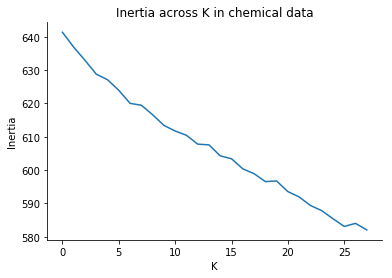

In [87]:
inertias = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X1)
    inertia = kmeans.inertia_
    #print(inertia)
    inertias.append(inertia)

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K data")
sns.despine()

There is no prominent elbow.

word_dictionary = []

for i in range(len(jobs_df)):
    doc = jobs_df.loc[i, 'comb_description_Q2']  
    word_dictionary.append(pre_process(doc))

In [88]:
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters=10)
X1 = tfidf.fit_transform(jobs_df['comb_description_Q2'])
kmeans.fit(X1)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X1))
 
silhouette_score = metrics.silhouette_score(X1, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[8 6 4 9 2 5 9 2 8 8 5 1 8 7 2 5 1 8 8 1 8 8 8 0 8 1 8 8 1 4 2 9 4 8 2 2 8
 8 8 8 4 9 1 1 8 8 3 1 6 2 6 1 2 5 3 2 2 9 5 2 6 5 2 4 1 4 5 8 9 8 0 4 2 5
 8 8 1 5 5 8 9 8 1 5 1 8 6 8 8 0 8 1 8 5 8 7 1 8 2 3 8 0 8 1 2 8 4 5 8 1 8
 0 5 1 7 6 8 1 8 5 8 1 3 5 8 7 4 4 2 5 1 5 8 5 7 2 5 5 8 0 1 7 1 2 4 2 4 8
 7 1 8 5 9 2 3 1 8 8 4 1 1 8 8 2 8 9 8 4 1 0 1 5 1 8 8 5 1 4 8 9 5 4 6 4 8
 6 0 2 2 2 3 2 1 8 5 2 5 1 2 4 3 8 6 8 4 2 1 5 1 8 2 0 8 8 6 1 9 3 0 2 6 8
 1 7 9 8 1 5 0 5 6 8 9 2 7 1 9 8 2 6 3 1 8 8 6 7 4 3 8 3 8 8 5 5 8 9 3 8 2
 2 6 1 3 6 2 8 5 5 5 3 9 1 5 2 8 2 2 1 8 5 2 6 8 8 4 6 7 6 5 6 8 7 2 6 2 8
 8 6 4 2 2 1 8 9 2 2 3 5 4 1 5 8 6 8 1 6 8 5 1 8 2 8 3 6 9 6 4 8 4 6 5 6 1
 4 3 2 1 5 5 8 9 2 8 8 8 5 5 2 8 2 0 8 8 5 6 6 2 0 5 4 8 5 6 8 4 8 8 8 8 2
 8 9 5 2 2 4 8 8 2 0 3 1 4 8 8 1 5 6 1 6 2 8 6 6 3 2 5 2 4 8 5 3 8 6 5 6 3
 7 9 5 5 7 4 3 0 4 4 3 2 5 6 2 6 4 4 5 8 8 5 4 4 5 6 4 8 7 1 1 8 9 7 9 3 1
 2 8 8 5 5 9 5 2 3 7 9 1 9 2 0 2 5 5 2 1 2 5 6 2 5 7 4 9 3 2 5 3

The Silhouette score is 0.008, meaning the average distance between neighbouring clusters are close to zero.

In [89]:
# Find the common words for each class

kMeans = KMeans(n_clusters=10)
kMeans.fit(X1)

predicted = kMeans.labels_
predicted

words = tfidf.get_feature_names()

common_words = kMeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : data, engineer, experience, big, cloud, team, work, working, technology, learning
1 : data, business, experience, system, skill, reporting, information, technology, role, project
2 : business, financial, role, sale, experience, team, client, data, opportunity, market
3 : digital, analytics, campaign, marketing, data, insight, team, adobe, experience, medium
4 : sa, code, ensure, long, competency, update, va, report, contract, business
5 : bi, data, power, microsoft, business, end, intelligence, ssis, azure, sql
6 : database, server, sql, experience, technical, data, technology, development, software, application
7 : administration, office, entry, customer, support, service, skill, role, experience, data
8 : research, health, data, application, position, university, intelligence, information, people, work
9 : privacy, insight, policy, data, research, customer, experis, information, www, bluefinresources


In [104]:
predicted

array([6, 6, 6, 6, 9, 9, 6, 9, 6, 6, 3, 9, 9, 0, 9, 6, 7, 6, 6, 7, 2, 6,
       3, 6, 6, 6, 2, 6, 9, 2, 9, 6, 9, 6, 9, 9, 2, 2, 2, 6, 6, 0, 9, 9,
       6, 9, 3, 6, 5, 9, 4, 3, 3, 6, 3, 9, 9, 6, 9, 9, 4, 9, 9, 6, 6, 6,
       3, 6, 9, 6, 9, 6, 9, 9, 6, 9, 6, 9, 3, 6, 0, 6, 6, 9, 6, 6, 6, 6,
       2, 6, 9, 9, 6, 9, 2, 9, 6, 6, 9, 3, 6, 9, 2, 9, 9, 6, 2, 9, 6, 6,
       2, 6, 9, 6, 9, 9, 6, 0, 2, 9, 9, 9, 9, 9, 9, 9, 9, 6, 9, 3, 1, 3,
       9, 9, 0, 9, 9, 3, 6, 6, 9, 9, 6, 9, 6, 9, 2, 6, 3, 6, 6, 9, 9, 9,
       3, 0, 6, 6, 6, 9, 4, 6, 9, 4, 2, 0, 6, 6, 1, 6, 6, 9, 4, 6, 9, 9,
       9, 6, 9, 6, 3, 9, 6, 2, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 9, 4, 4, 6,
       9, 6, 3, 2, 3, 6, 6, 9, 9, 3, 9, 6, 4, 9, 6, 9, 9, 3, 6, 9, 6, 9,
       4, 6, 9, 0, 9, 6, 3, 9, 1, 9, 9, 6, 9, 9, 9, 1, 0, 6, 9, 6, 3, 3,
       6, 6, 6, 0, 6, 3, 9, 9, 2, 6, 9, 3, 0, 9, 9, 6, 9, 9, 9, 6, 9, 9,
       9, 6, 3, 9, 3, 9, 9, 0, 6, 9, 9, 9, 9, 3, 2, 3, 9, 9, 9, 6, 6, 9,
       9, 9, 9, 9, 2, 9, 9, 4, 9, 3, 6, 6, 6, 9, 9,

We will need to now test to see how accurately the clustering classifies the job titles..

In [103]:
#from sklearn.metrics import completeness_score

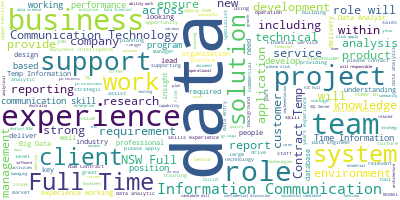

In [31]:
# Just for fun
# Import the wordcloud library
from wordcloud import WordCloud

# Join the terms in 'comb_description' together.
comb_description = ','.join(list(jobs_df['comb_description'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(comb_description)
# Visualize the word cloud
wordcloud.to_image()